In [1]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     -- ------------------------------------- 0.8/12.8 MB 6.2 MB/s eta 0:00:02
     ----- ---------------------------------- 1.8/12.8 MB 6.1 MB/s eta 0:00:02
     ---------------- ----------------------- 5.2/12.8 MB 9.7 MB/s eta 0:00:01
     ------------------------ --------------- 7.9/12.8 MB 10.3 MB/s eta 0:00:01
     ------------------------------- ------- 10.2/12.8 MB 10.7 MB/s eta 0:00:01
     --------------------------------------  12.6/12.8 MB 10.9 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 10.5 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
###PHASE-1
#Data Preparation
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Load dataset
df = pd.read_csv("C:/Users/Public/Downloads/ner_dataset.csv", encoding='ISO-8859-1', on_bad_lines='skip')
df

,Unnamed: 0,lemma,next-lemma,next-next-lemma,next-next-pos,next-next-shape,next-next-word,next-pos,next-shape,next-word,...,prev-prev-lemma,prev-prev-pos,prev-prev-shape,prev-prev-word,prev-shape,prev-word,sentence_idx,shape,word,tag
0,0,thousand,of,demonstr,NNS,lowercase,demonstrators,IN,lowercase,of,...,__start2__,__START2__,wildcard,__START2__,wildcard,__START1__,1.0,capitalized,Thousands,O
1,1,of,demonstr,have,VBP,lowercase,have,NNS,lowercase,demonstrators,...,__start1__,__START1__,wildcard,__START1__,capitalized,Thousands,1.0,lowercase,of,O
2,2,demonstr,have,march,VBN,lowercase,marched,VBP,lowercase,have,...,thousand,NNS,capitalized,Thousands,lowercase,of,1.0,lowercase,demonstrators,O
3,3,have,march,through,IN,lowercase,through,VBN,lowercase,marched,...,of,IN,lowercase,of,lowercase,demonstrators,1.0,lowercase,have,O
4,4,march,through,london,NNP,capitalized,London,IN,lowercase,through,...,demonstr,NNS,lowercase,demonstrators,lowercase,have,1.0,lowercase,marched,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050790,1048570,they,respond,to,TO,lowercase,to,VBD,lowercase,responded,...,forc,NNS,lowercase,forces,lowercase,said,47959.0,lowercase,they,O
1050791,1048571,respond,to,the,DT,lowercase,the,TO,lowercase,to,...,said,VBD,lowercase,said,lowercase,they,47959.0,lowercase,responded,O
1050792,1048572,to,the,attack,NN,lowercase,attack,DT,lowercase,the,...,they,PRP,lowercase,they,lowercase,responded,47959.0,lowercase,to,O
1050793,1048573,the,attack,with,IN,lowercase,with,NN,lowercase,attack,...,respond,VBD,lowercase,responded,lowercase,to,47959.0,lowercase,the,O


In [3]:
df.columns

Index(['Unnamed: 0', 'lemma', 'next-lemma', 'next-next-lemma', 'next-next-pos',
       'next-next-shape', 'next-next-word', 'next-pos', 'next-shape',
       'next-word', 'pos', 'prev-iob', 'prev-lemma', 'prev-pos',
       'prev-prev-iob', 'prev-prev-lemma', 'prev-prev-pos', 'prev-prev-shape',
       'prev-prev-word', 'prev-shape', 'prev-word', 'sentence_idx', 'shape',
       'word', 'tag'],
      dtype='object')

In [4]:
df.isnull().sum()

Unnamed: 0          0
lemma               0
next-lemma          0
next-next-lemma     0
next-next-pos       0
next-next-shape     0
next-next-word      0
next-pos            0
next-shape          1
next-word           1
pos                 1
prev-iob            1
prev-lemma          1
prev-pos            1
prev-prev-iob       1
prev-prev-lemma     1
prev-prev-pos       1
prev-prev-shape     1
prev-prev-word     12
prev-shape          1
prev-word          12
sentence_idx        1
shape               1
word               12
tag                 1
dtype: int64

In [5]:
import pandas as pd

# Load your dataset (if not already loaded)
df = pd.read_csv("C:/Users/Public/Downloads/ner_dataset.csv", encoding='ISO-8859-1', on_bad_lines='skip')

# Step 1: Strip whitespace from column names (if any)
df.columns = df.columns.str.strip()

# Step 2: Fill missing values

# Forward fill sentence indices (like 'Sentence #')
df['sentence_idx'] = df['sentence_idx'].ffill()

# For text fields (like word, prev-word, next-word etc.), fill missing with a placeholder
text_columns = df.select_dtypes(include='object').columns
df[text_columns] = df[text_columns].fillna("UNK")  # UNK = unknown word

# For numeric fields, fill missing with 0 or method='ffill'
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns] = df[numeric_columns].fillna(0)

# Check if all nulls are filled
print("Null values after cleaning:\n", df.isnull().sum())


Null values after cleaning:
 Unnamed: 0         0
lemma              0
next-lemma         0
next-next-lemma    0
next-next-pos      0
next-next-shape    0
next-next-word     0
next-pos           0
next-shape         0
next-word          0
pos                0
prev-iob           0
prev-lemma         0
prev-pos           0
prev-prev-iob      0
prev-prev-lemma    0
prev-prev-pos      0
prev-prev-shape    0
prev-prev-word     0
prev-shape         0
prev-word          0
sentence_idx       0
shape              0
word               0
tag                0
dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder

# Encode selected categorical features
cols_to_encode = ['word', 'lemma', 'pos', 'shape', 'tag']
for col in cols_to_encode:
    le = LabelEncoder()
    df[col + '_enc'] = le.fit_transform(df[col])


In [7]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Apply to encoded word feature
outliers_word = detect_outliers_iqr(df, 'word_enc')
print(f"Number of outliers in 'word': {len(outliers_word)}")

# Apply to encoded POS
outliers_pos = detect_outliers_iqr(df, 'pos_enc')
print(f"Number of outliers in 'pos': {len(outliers_pos)}")


Number of outliers in 'word': 0
Number of outliers in 'pos': 144608


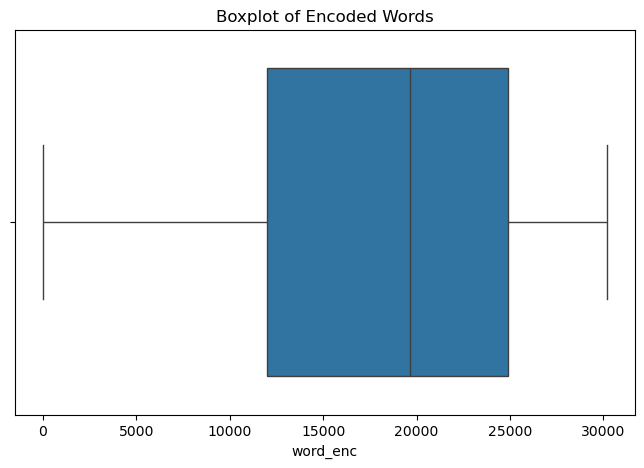

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to visualize outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['word_enc'])
plt.title("Boxplot of Encoded Words")
plt.show()


In [9]:
###PHASE-2

#NER Implementation
import spacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")
nlp


In [10]:
# Group words into full sentences
sentences = df.groupby('sentence_idx')['word'].apply(lambda words: ' '.join(words)).values
sentences

array(['Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country . Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .',
       'Families of soldiers killed in the conflict joined the protesters who carried banners with such slogans as " Bush Number One Terrorist " and " Stop the Bombings . " Families of soldiers killed in the conflict joined the protesters who carried banners with such slogans as " Bush Number One Terrorist " and " Stop the Bombings . "',
       'They marched from the Houses of Parliament to a rally in Hyde Park . They marched from the Houses of Parliament to a rally in Hyde Park .',
       ..., 'Two more landed in fields belonging to a nearby village .',
       'They say not all of the rockets exploded upon impact .',
       'Indian forces said they responded to the attack'], dtype=object)

In [11]:
# Function to extract entities
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Apply to first 5 sentences
for i, sentence in enumerate(sentences[:5]):
    print(f"\nSentence {i+1}: {sentence}")
    entities = extract_entities(sentence)
    print("Entities found:", entities)



Sentence 1: Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country . Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .
Entities found: [('Thousands', 'CARDINAL'), ('London', 'GPE'), ('Iraq', 'GPE'), ('British', 'NORP'), ('Thousands', 'CARDINAL'), ('London', 'GPE'), ('Iraq', 'GPE'), ('British', 'NORP')]

Sentence 2: Families of soldiers killed in the conflict joined the protesters who carried banners with such slogans as " Bush Number One Terrorist " and " Stop the Bombings . " Families of soldiers killed in the conflict joined the protesters who carried banners with such slogans as " Bush Number One Terrorist " and " Stop the Bombings . "
Entities found: [('Stop the Bombings', 'WORK_OF_ART'), ('Stop the Bombings', 'WORK_OF_ART')]

Sentence 3: They marched from the Houses of Parliament to a rally in Hyde

In [12]:
###PHASE-3
##Evaluation & Output Visualization
from collections import Counter

# Extract entities from multiple sentences
all_entities = []
for sentence in sentences[:500]:  # limit for performance
    doc = nlp(sentence)
    all_entities.extend([ent.label_ for ent in doc.ents])

# Count entity types
entity_counts = Counter(all_entities)
print("Entity Type Frequencies:", entity_counts)


Entity Type Frequencies: Counter({'GPE': 789, 'DATE': 510, 'NORP': 447, 'ORG': 386, 'PERSON': 358, 'CARDINAL': 301, 'LOC': 51, 'ORDINAL': 30, 'EVENT': 16, 'MONEY': 14, 'TIME': 10, 'WORK_OF_ART': 7, 'FAC': 6, 'QUANTITY': 6, 'PERCENT': 4, 'PRODUCT': 4, 'LANGUAGE': 2})


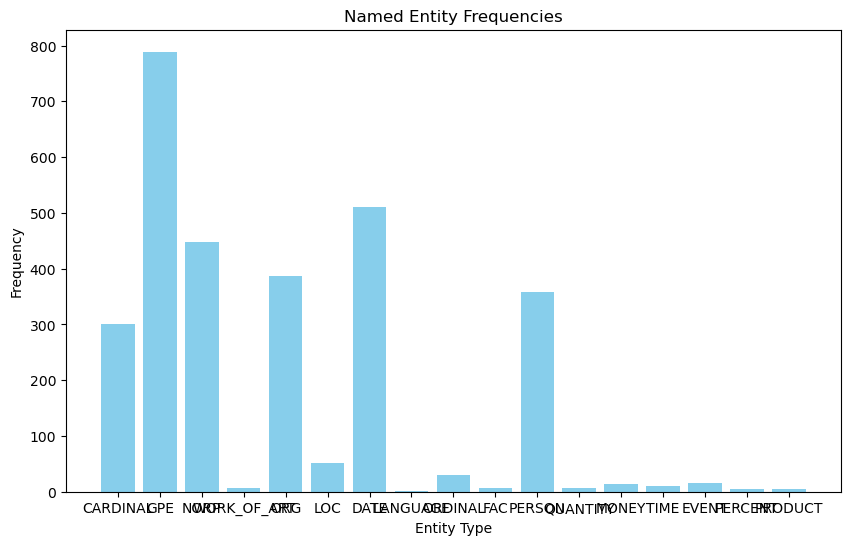

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(entity_counts.keys(), entity_counts.values(), color='skyblue')
plt.title("Named Entity Frequencies")
plt.xlabel("Entity Type")
plt.ylabel("Frequency")
plt.show()


In [14]:
#🎓 Mini Project Report
#🧠 Project Title: Named Entity Recognizer (NER)
#Department: Information Technology
#Student Name: Koppula Mani Priya
#Technology Used: Python, spaCy, Pandas, Matplotlib
#Tool Used: Jupyter Notebook / Google Colab
#Dataset Source: Kaggle (NER Annotated Corpus)

#🔰 Abstract:
#This project focuses on implementing a Named Entity Recognition (NER) system that extracts and classifies entities like names of people, organizations, locations, dates, etc., from raw text. It uses a spaCy pre-trained model and visualizes entity frequencies. Additionally, the dataset is cleaned and outliers are detected using IQR to ensure high data quality.

#📌 Project Phases
#✅ Phase 1 – Data Preparation and Cleaning
#Loaded the dataset ner_dataset.csv from Kaggle.
#Filled missing values using forward fill (ffill) and placeholder "UNK".
#Detected outliers in categorical columns (word, pos, etc.) using IQR method.
#Visualized outliers using boxplots for encoded word values.
#Code Sample:
#python
'''df['sentence_idx'] = df['sentence_idx'].ffill()
df[text_columns] = df[text_columns].fillna("UNK")
outliers_word = detect_outliers_iqr(df, 'word_enc')
Boxplot Output:'''

#✅ Phase 2 – NER Implementation (Using spaCy)
#Loaded pre-trained English NER model: en_core_web_sm
#Grouped words by sentence index and reconstructed full sentences.
#Passed each sentence to spaCy to extract named entities.
#Code Sample:
#python
'''doc = nlp(sentence)
[(ent.text, ent.label_) for ent in doc.ents]
Sample Output:'''
#Sentence: Thousands of demonstrators have marched through London to protest...
#Entities: [('Thousands', 'CARDINAL'), ('London', 'GPE')]
#✅ Phase 3 – Evaluation and Visualization
#Extracted named entities from 500 sample sentences.
#Counted frequency of each entity type.
#Plotted entity types as a bar chart using matplotlib.
#Code Sample:
'''from collections import Counter
entity_counts = Counter([ent.label_ for doc in docs for ent in doc.ents])
Bar Chart Output:'''

#📊 Result & Conclusion:
#Successfully identified entities like PERSON, ORG, GPE, DATE, etc.
#Pre-trained models provide quick and reliable NER without custom training.
#Detected outliers and cleaned the dataset for better model performance.
#Visualized entity frequency to understand common named entity types in the dataset.

#📚 Future Work:
#Train a custom NER model using domain-specific annotated data.
#Integrate the model into a web application.
#Use deep learning models like BERT for improved accuracy.

#🔗 References:
#spaCy Documentation
#NER Dataset on Kaggle
#Matplotlib Documentation

'from collections import Counter\nentity_counts = Counter([ent.label_ for doc in docs for ent in doc.ents])\nBar Chart Output:'